In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [2]:
!pip install tensorflow

In [5]:
traindir = "/content/drive/MyDrive/train data/train"
testdir = "/content/drive/MyDrive/test data/test/test/test"
validdir = "/content/drive/MyDrive/Validation data/Validation"

In [8]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 8057 images belonging to 5 classes.
Found 5993 images belonging to 5 classes.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
class_dict = training_set.class_indices
print(class_dict)

{'apple_scab': 0, 'black_rot': 1, 'blotch': 2, 'cedar_apple_rust': 3, 'healthy': 4}


In [10]:
li = list(class_dict.keys())
print(li)

['apple_scab', 'black_rot', 'blotch', 'cedar_apple_rust', 'healthy']


In [11]:
 train_num = training_set.samples
 valid_num = valid_set.samples

In [12]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
classifier = keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5, activation='softmax'))
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       125,445 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 125,445 (490.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [15]:
# Compile the model
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model to the training data
history = classifier.fit(
    training_set,
    steps_per_epoch=train_num // batch_size,
    validation_data=valid_set,
    epochs=5,
    validation_steps=valid_num//batch_size,
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 4681s 75s/step - accuracy: 0.5716 - loss: 1.2130 - val_accuracy: 0.9492 - val_loss: 0.2095
Epoch 2/5
 1/62 ━━━━━━━━━━━━━━━━━━━━ 29s 490ms/step - accuracy: 0.8828 - loss: 0.3789

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8828 - loss: 0.3789 - val_accuracy: 0.9496 - val_loss: 0.2053
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9187 - loss: 0.2706 - val_accuracy: 0.9671 - val_loss: 0.1329
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 470ms/step - accuracy: 0.9375 - loss: 0.2573 - val_accuracy: 0.9597 - val_loss: 0.1472
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.9375 - loss: 0.2099 - val_accuracy: 0.9706 - val_loss: 0.1121


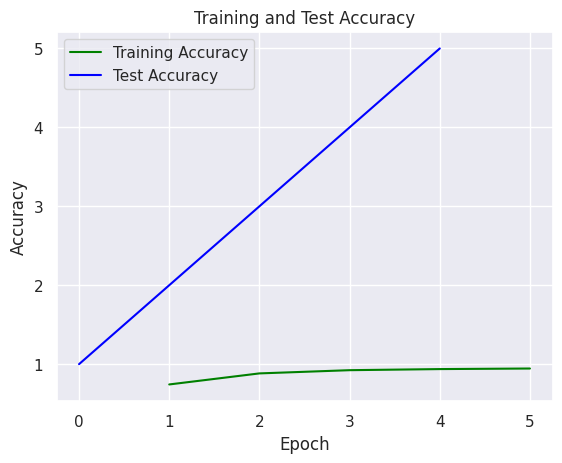

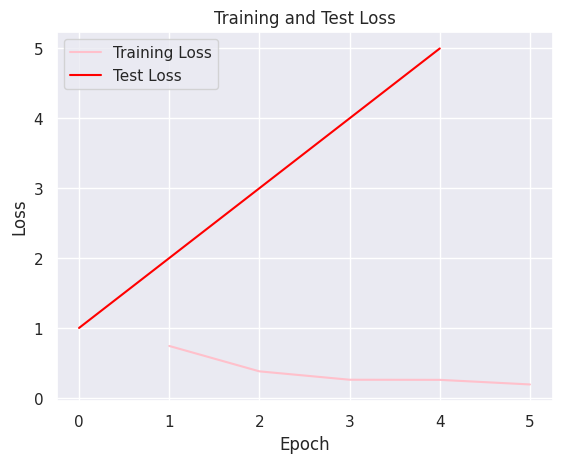

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, color='blue', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, color='red', label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

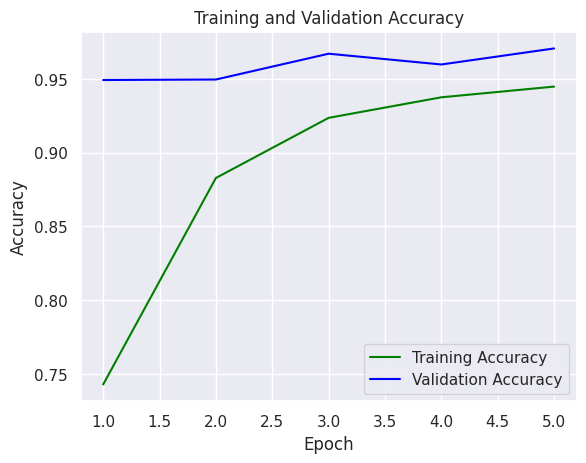

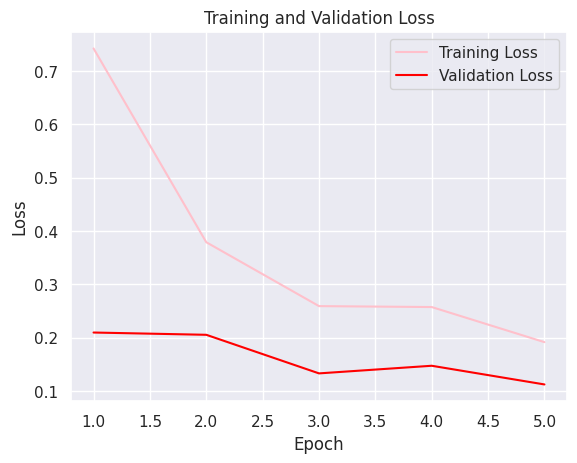

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
y_true = valid_set.classes
y_pred = classifier.predict(valid_set)
y_probs = y_pred[:, 1]  # Assuming binary classification (positive class)
# class_labels = training_set.class_indices.keys()  # Change to valid_set if needed
# class_counts = [sum(y_true == class_label) for class_label in class_labels]


47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step


In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the validation set
y_pred_probs = classifier.predict(valid_set)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Obtain true labels from valid_set
y_true = valid_set.classes

# Now you can compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 654ms/step


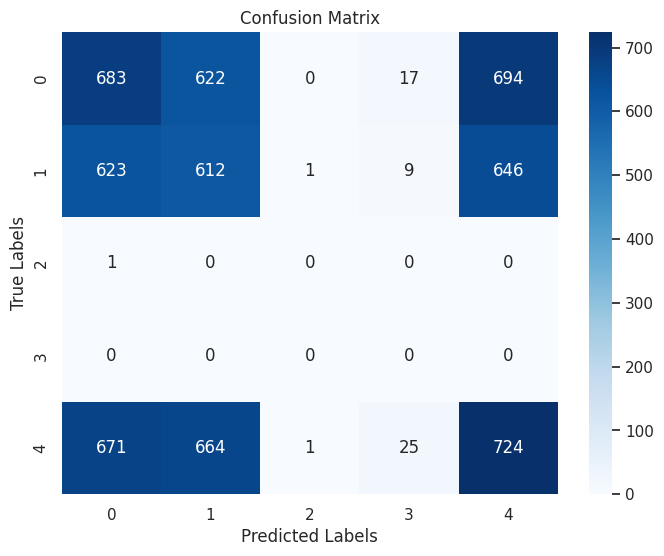

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# conf_matrix = confusion_matrix(valid_set.classes, classifier.predict(valid_set))
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [22]:
y_true = [0, 1, 1, 0, 1]  # Actual binary labels
y_probs = [0.2, 0.7, 0.6, 0.3, 0.8]  # Predicted probabilities for the positive class


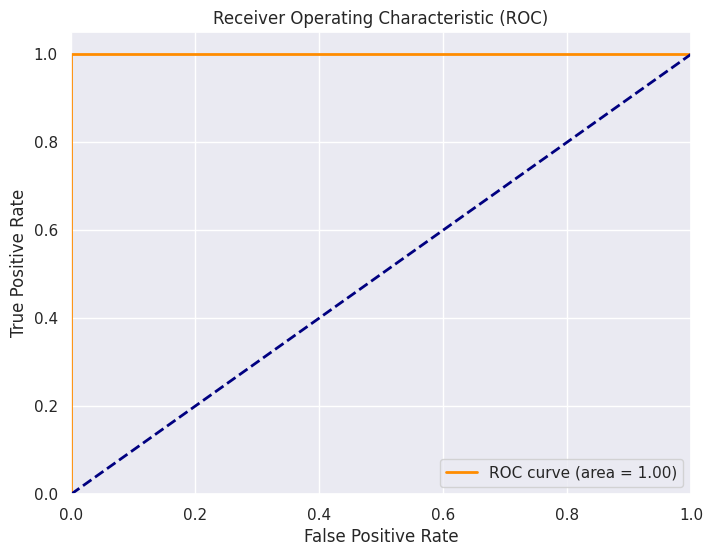

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_probs) for binary classification
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


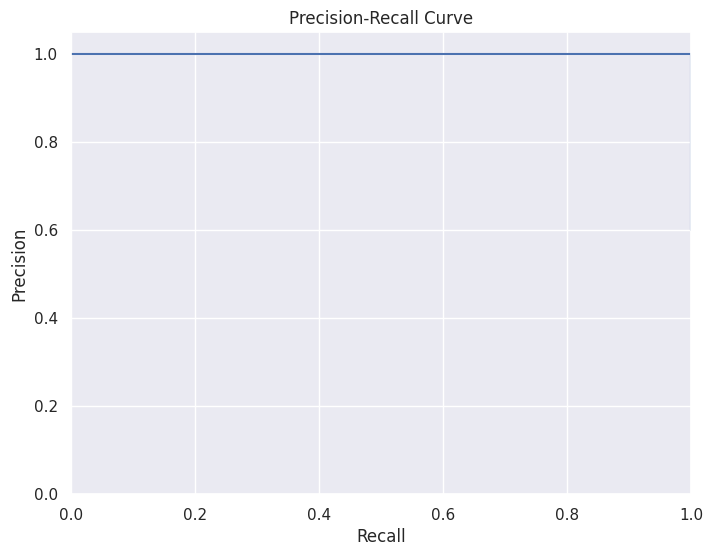

In [24]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_probs)
precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


Following is our prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


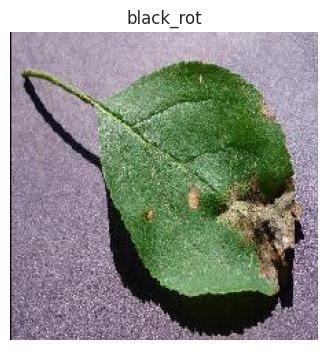

In [27]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/train data/train/black_rot/74dfd7d6-e78e-47d9-8530-35acab5cd01f___JR_FrgE.S 3027_270deg.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [29]:
# Save the training history to a file
import pickle
with open('training_history.pkl', 'wb') as history_file:
    pickle.dump(history.history, history_file)